In [37]:
import networkx as nx
import numpy as np
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt

class Graph:
    def __init__ (self, graph):
        """
        Parameters
        ----------
        graph -- a NetworkX graph
    
        """
        self.graph = graph
        self.nodes = graph.nodes()
        self.edgelist = graph.edges()
        self.S_Lap = None       
        self.S_Adj = None       
        self.Lap = None        
        self.Adj = None         
#         self.matrixes = []      # A list of matrixes generated
# test it is connected 
# def return list_of_graph(each different connected components)
# 
    def add_matrix(self, matrix):
        """
        Add a matrixto the self.matrixes list
        """
#         self.matrixes.append(matrix)
    def create_Adj(self):
        """
        Return
        ----------
        Adjacency matrix of the graph 
        
        """
        self.Adj = np.zeros((len(self.nodes),len(self.nodes)))
        for i,j in self.edgelist:
            self.Adj[i,j] = 1
            self.Adj[j,i] = 1
#         self.add_matrix(self.Adj)
        return self.Adj
    
    def create_Lap(self):
        """
        Return
        ----------
        Laplacian matrix of the graph 
        """
        if self.Adj == None:
            self.Adj = np.zeros((len(self.nodes),len(self.nodes)))
            for i,j in self.edgelist:
                self.Adj[i,j] = 1
                self.Adj[j,i] = 1
#             self.add_matrix(self.Adj)
        self.Deg = np.diag(self.Adj.sum(axis=0))
        self.Lap = self.Deg - self.Adj 
#         self.add_matrix(self.Lap)
        return self.Lap
    
    def compute_eig(self, matrix):
        (self.eigvalue, self.eigvec) = np.linalg.eig(matrix)
        
    def plot_eigenval(self):
         #call compute_eig before plotting the eigenvalue
        eig_vals_sorted = np.sort(self.eigvalue)
        plt.plot(eig_vals_sorted)
        plt.show() 
        
    def plot_edge_eigenvec(self, p, q):
        sort_eigvec = self.eigvec[:, self.eigvalue.argsort()]
        vec1 = sort_eigvec[:, p-1]
        vec2 = sort_eigvec[:, q-1]
        plt.scatter(vec1, vec2)
        for j,k in self.edgelist:
            plt.plot(vec1[[j,k]],vec2[[j,k]])
        plt.show()
        
    def create_sparse_Lap (self):
        """
        Return
        ----------
        A laplacian matrix of the graph
        """
        return nx.laplacian_matrix(self.graph)
    def create_sparse_Adj(self):
        """
        SciPy sparse matrix
        Adjacency matrix 
        """
        return nx.to_scipy_sparse_matrix(self.graph, self.nodes, weight='weight',
                                  format='csr')
    def compute_sparse_eig(self, matrix, k = 6):
        self.s_vals, self.s_vecs = sparse.linalg.eigsh(matrix.asfptype(), k, which = 'SM')
    
    def plot_sparse_eigenval(self):
        #call comput_sparse_eig before plotting the eigenvalue
        plt.plot(self.s_vals)
        plt.show()
        
    def plot_edge_eigenvec_sparse(self, p, q):
         #call comput_sparse_eig before plotting the eigenvalue

        plt.scatter(self.s_vecs[:,p-1],self.s_vecs[:,q-1])
        vec1 = self.s_vecs[:,p-1]
        vec2 = self.s_vecs[:,q-1]
        for j,k in self.edgelist:
            plt.plot(vec1[[j,k]],vec2[[j,k]])
        plt.show()
        
  
    def print_scipy(self, sparse_matrix):
        """
        Print out a NumPy matrix object with the same shape 
        and containing the same data represented by the sparse matrix
        """
        print(sparse_matrix.todense())

# class Matrix:
#     def __init__(self, matrix, edgelist):
#         self.matrix = matrix
#         self.edgelist = edgelist  # An edgelist of the graph
        
    
# class NumpyMatrix(Matrix):
#     def __init__(self, matrix, edgelist):
#         Matrix.__init__(self, matrix, edgelist)
#         self.eigvals, self.eigvecs = np.linalg.eig(matrix)  # Find the eigenvalues and eigenvectors for the numpy matrix
        
#     def plot_eigenvals(self):
#         """
#         Sort eigvals from smallest to largest and plot them
#         """
#         eigvals_sorted = np.sort(self.eigvals)
#         plt.plot(eigvals_sorted)
#         plt.show() 
        
#     def plot_edge_eigenvecs(self, p, q):
#         """
#         Scatters the pth and qth eigenvectors of the Laplacian Matrix and plots edges according to edgelist 

#         Parameters
#         ----------
#         p --- pth eigenvectors
#         q --- qth eigenvectors

#         Notes: eigenvectors are sorted by lowest to highest values of eigenvalues of the numpy matrix
#         """
#         sort_eigvecs = self.eigvecs[:, self.eigvals.argsort()]
#         vec1 = sort_eigvecs[:, p-1]
#         vec2 = sort_eigvecs[:, q-1]
#         plt.scatter(vec1, vec2)
#         for j,k in self.edgelist:
#             plt.plot(vec1[[j,k]],vec2[[j,k]])
#         plt.show()
        
#     # def metho_compute()

        
# class ScipyMatrix(Matrix):
# #spcify k. 

#     def __init__(self, matrix, edgelist):
#         Matrix.__init__(self, matrix, edgelist)
#         self.s_eigvals, self.s_eigvecs = sparse.linalg.eigsh(matrix.asfptype(), k = matrix.shape[0] -1, which = 'SM')
        
#     def plot_eigenvals(self):
#         plt.plot(self.s_eigvals)
#         plt.show()
        
#     def plot_edge_eigenvecs(self, p, q):
#         """
#         Scatters the pth and qth eigenvectors of the Laplacian Matrix and plots edges according to edgelist 

#         Parameters
#         ----------
#         p --- pth eigenvectors
#         q --- qth eigenvectors

#         Notes
#         ----------
#         eigenvectors are sorted by lowest to highest values of eigenvalues of the scipy matrix
#         """        
#         plt.scatter(self.s_eigvecs[:,p-1],self.s_eigvecs[:,q-1])
#         vec1 = self.s_eigvecs[:,p-1]
#         vec2 = self.s_eigvecs[:,q-1]
#         for j,k in self.edgelist:
#             plt.plot(vec1[[j,k]],vec2[[j,k]])
#         plt.show()

In [38]:
G = nx.path_graph(100)
a = Graph(G)

/Users/zhaowanhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:51: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


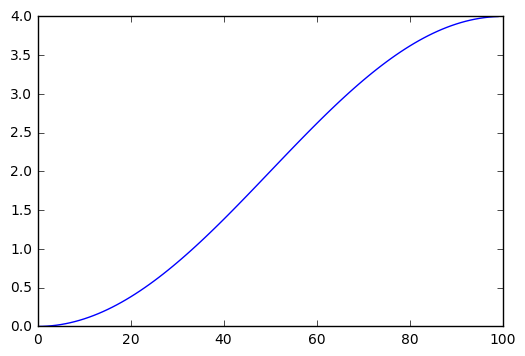

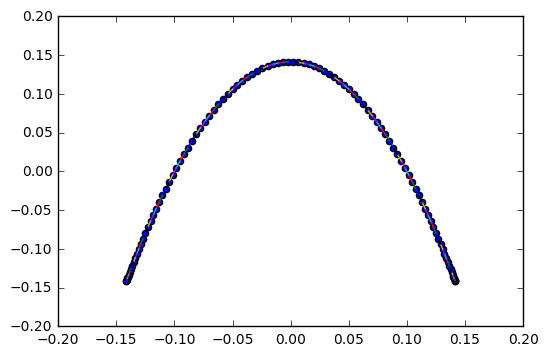

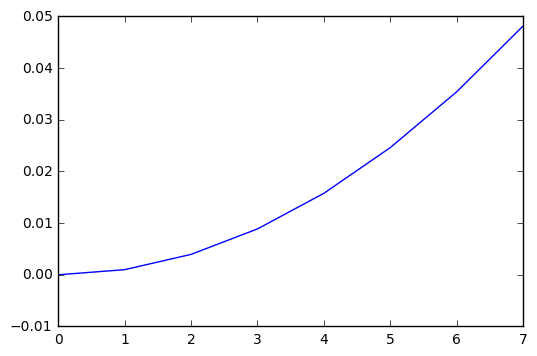

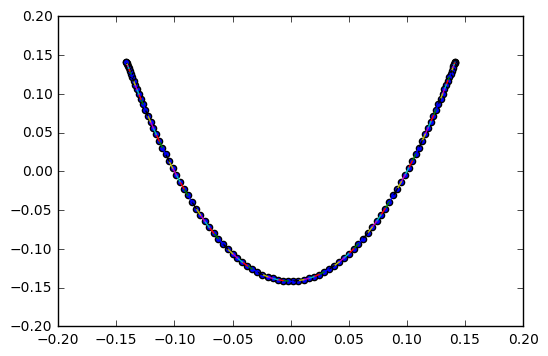

In [41]:
a_L = a.create_Lap()
a.compute_eig(a_L)
a.plot_eigenval()
a.plot_edge_eigenvec(2,3)

a_S_L = a.create_sparse_Lap()
a.compute_sparse_eig(a_S_L, 8)
a.plot_sparse_eigenval()
a.plot_edge_eigenvec_sparse(2,3)